# Canadian Immigration Data

Data Source : [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows)

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>

## Objectives
1. Create a basic line plot and scatter plot with Matplotlib.
2. Visualize a dataset with histograms and box plots using Seaborn

In [4]:
# import libraries
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings("ignore")

In [6]:
plt.style.use("seaborn-v0_8")

In [7]:
# read data into pandas dataframe
file_name = "Canada_migration_flow.xlsx"
df = pd.read_excel(file_name,
                   skiprows=20,
                   sheet_name="Canada by Citizenship",
                   skipfooter=2)

print("File read into Pandas Dataframe")

File read into Pandas Dataframe


In [8]:
# Display first five rows
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# Display last five rows
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [10]:
# shape of the dataset
print(df.shape)

(195, 43)


In [11]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [12]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [13]:
# Drop irrelevant columns
df.drop(["Type", "Coverage", "AREA", "REG", "DEV"], axis=1, inplace=True)

df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
# Rename Column names
df.rename(columns={"OdName": "Country", "AreaName": "Continent", "RegName": "Region"}, inplace=True)

df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [15]:
# Total column that sums up the total number of immigrants from 1980 - 2013 for each country
df["Total"] = df.select_dtypes(include="number").sum(axis=1)

df["Total"]

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

In [16]:
# Quick descriptive statistics of all columns
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## Exploratory Data Analysis,

In [18]:
# set the country column as index for easy selection
df.set_index("Country", inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [19]:
df.index.name = None
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


Distribution of the Numeric data types

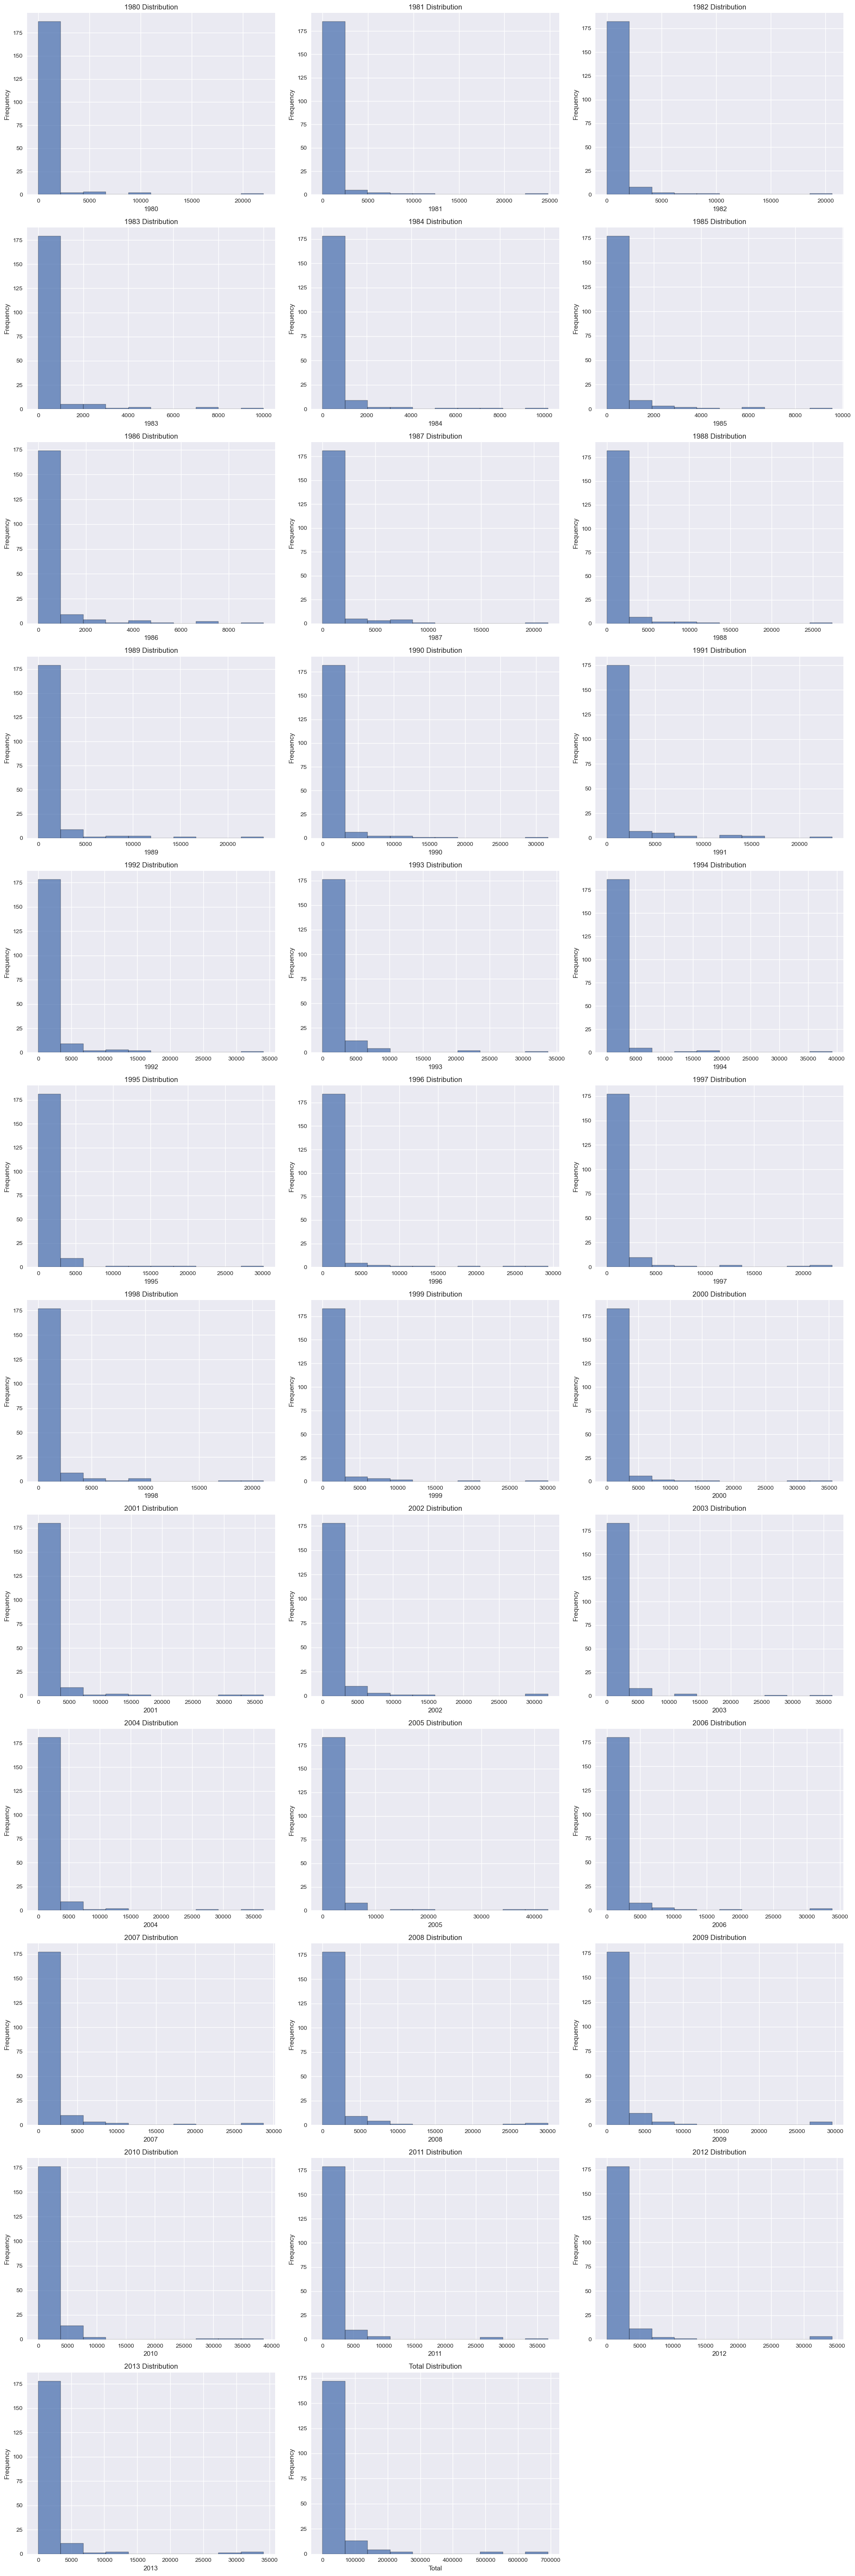

In [21]:
numeric_cols = df.select_dtypes(include="number").columns  # numeric columns
n_cols = 3  
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df, x=col, bins=10, ax=axs[i])
    axs[i].set_title(f"{col} Distribution")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlabel(col)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show();

In [22]:
# Unique Continents
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

Distribution of Total Immigrants Among Each Continent

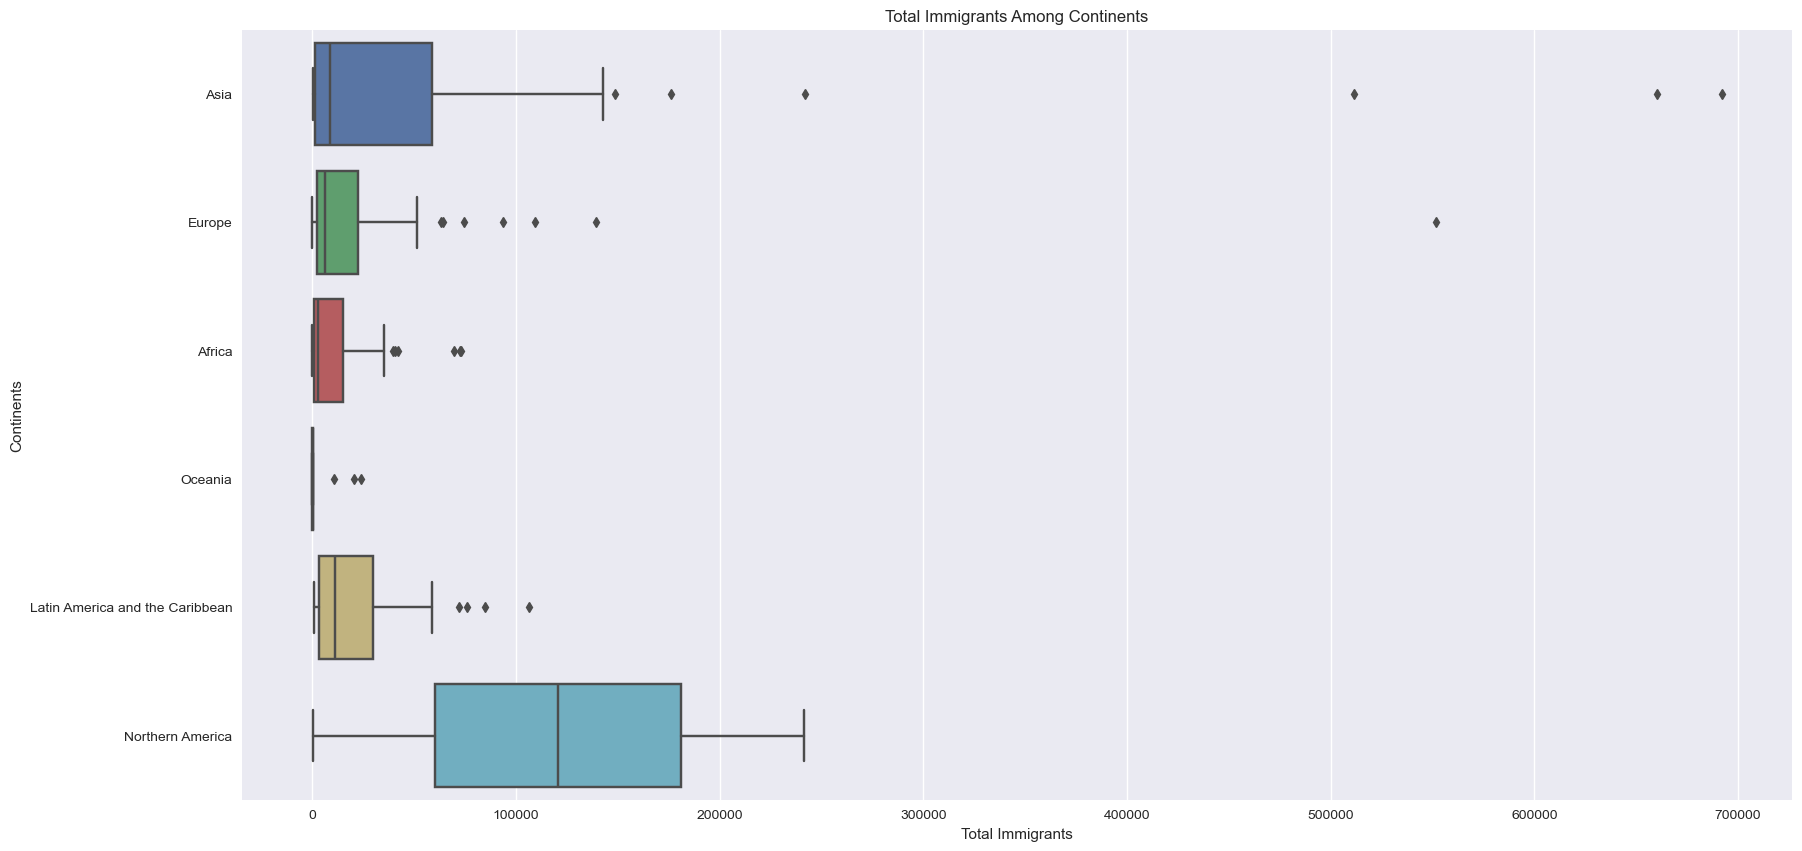

In [24]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.boxplot(df, x="Total", y="Continent", orient="h")
axs.set_title("Total Immigrants Among Continents")
axs.set_ylabel("Continents")
axs.set_xlabel("Total Immigrants")

plt.show();

In [25]:
df_continent = df[["Continent", "Total"]].groupby("Continent", as_index=False).agg({"Total": "sum"})
df_continent

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


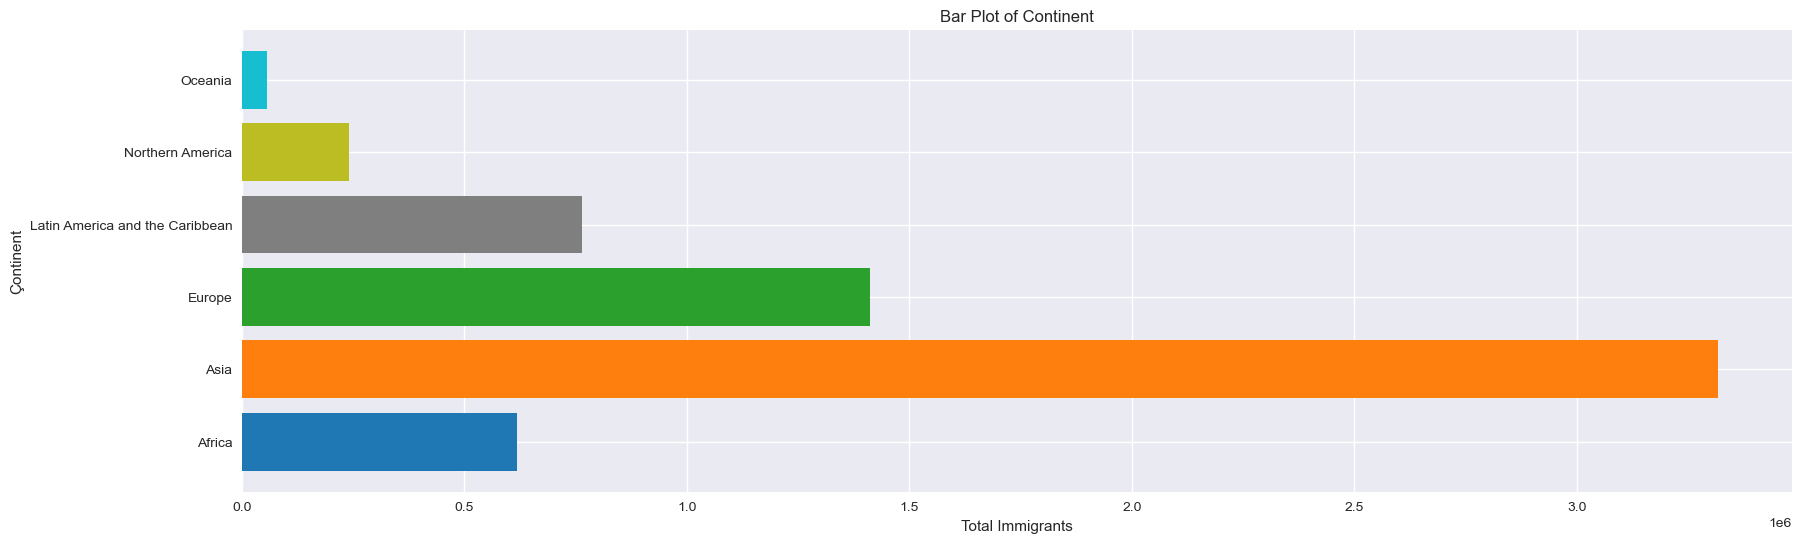

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.barh("Continent", "Total",  data=df_continent, color=("tab:blue", "tab:orange", "tab:green", "tab:grey", "tab:olive", "tab:cyan"))
ax.set_title("Bar Plot of Continent")
ax.set_xlabel("Total Immigrants")
ax.set_ylabel("Çontinent")

plt.show();

Compare Top Three Asian Country

In [28]:
df_asia = df[df["Continent"] == "Asia"].sort_values("Total", ascending=False).head(3)
df_asia

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


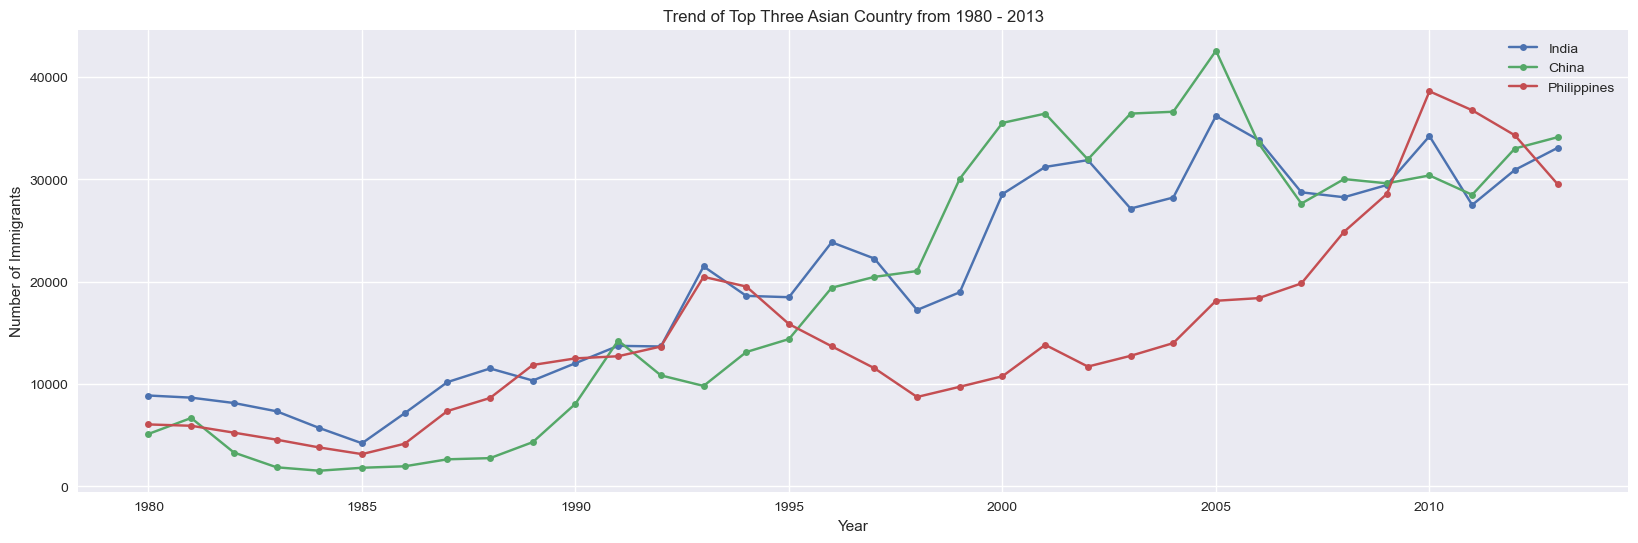

In [29]:
df_asia = df_asia.loc[:, 1980:2013].transpose()

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(df_asia, marker="o", markersize=5)
ax.set_title("Trend of Top Three Asian Country from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
ax.legend(["India", "China", "Philippines"])

plt.show();

### Scatter Plot

Using scatter plot to visualize trend of total immigrants to Canada (all countries combined) frpm 1980 to 2013

In [33]:
# Get the total immigrants for each year
df_total = pd.DataFrame(df.loc[:, 1980:2013].sum(axis=0)).reset_index()

# assign column
df_total.columns = ["Years", "Total"]

df_total.head(8)

,Years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771


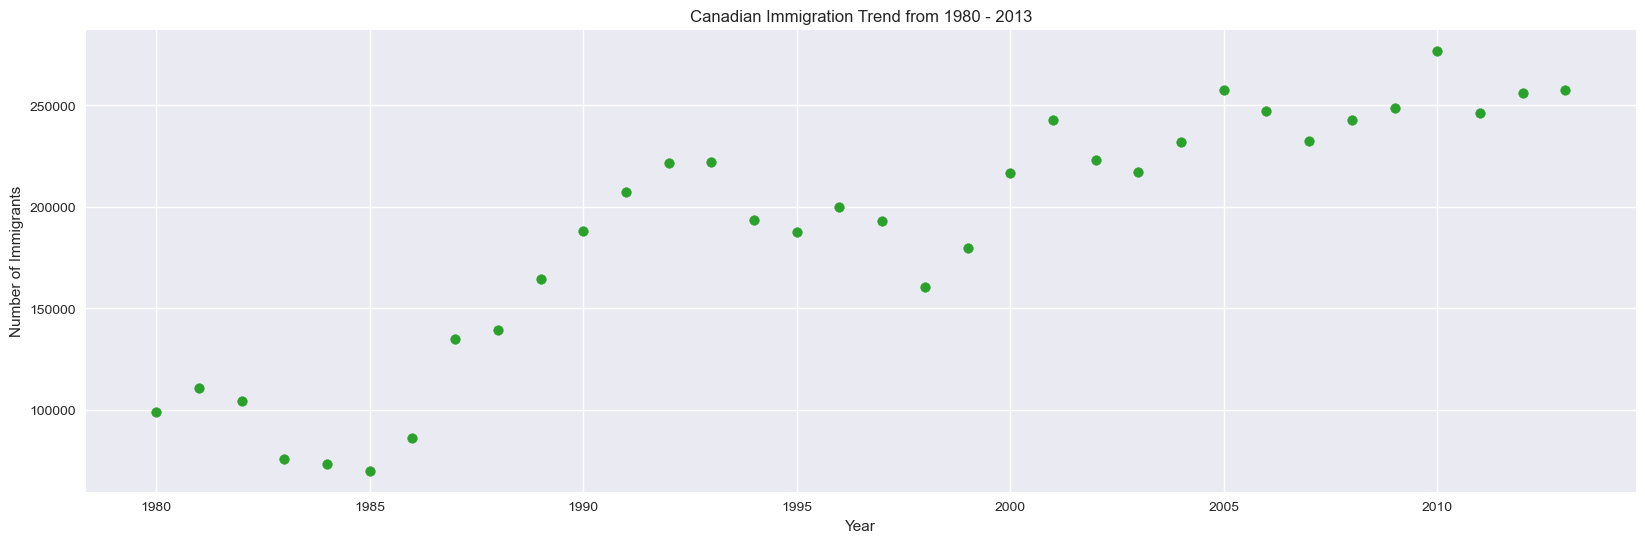

In [34]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter("Years", "Total", data=df_total, marker="o", color="tab:green")
ax.set_title("Canadian Immigration Trend from 1980 - 2013")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Year")

plt.show();

### Top 5 Country to Migrate to Canada from the Year 1980 - 2013

In [36]:
df_con = df

df_con.index.name = "Country"
df_con.reset_index(inplace=True)
df_con

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [37]:
# Group dataframe by Country and return top 5 country with highest immigrants
df_top5 = df[["Country", "Total"]].sort_values("Total", ascending=False).head()

df_top5

,Country,Total
79,India,691904
36,China,659962
183,United Kingdom of Great Britain and Northern I...,551500
136,Philippines,511391
130,Pakistan,241600


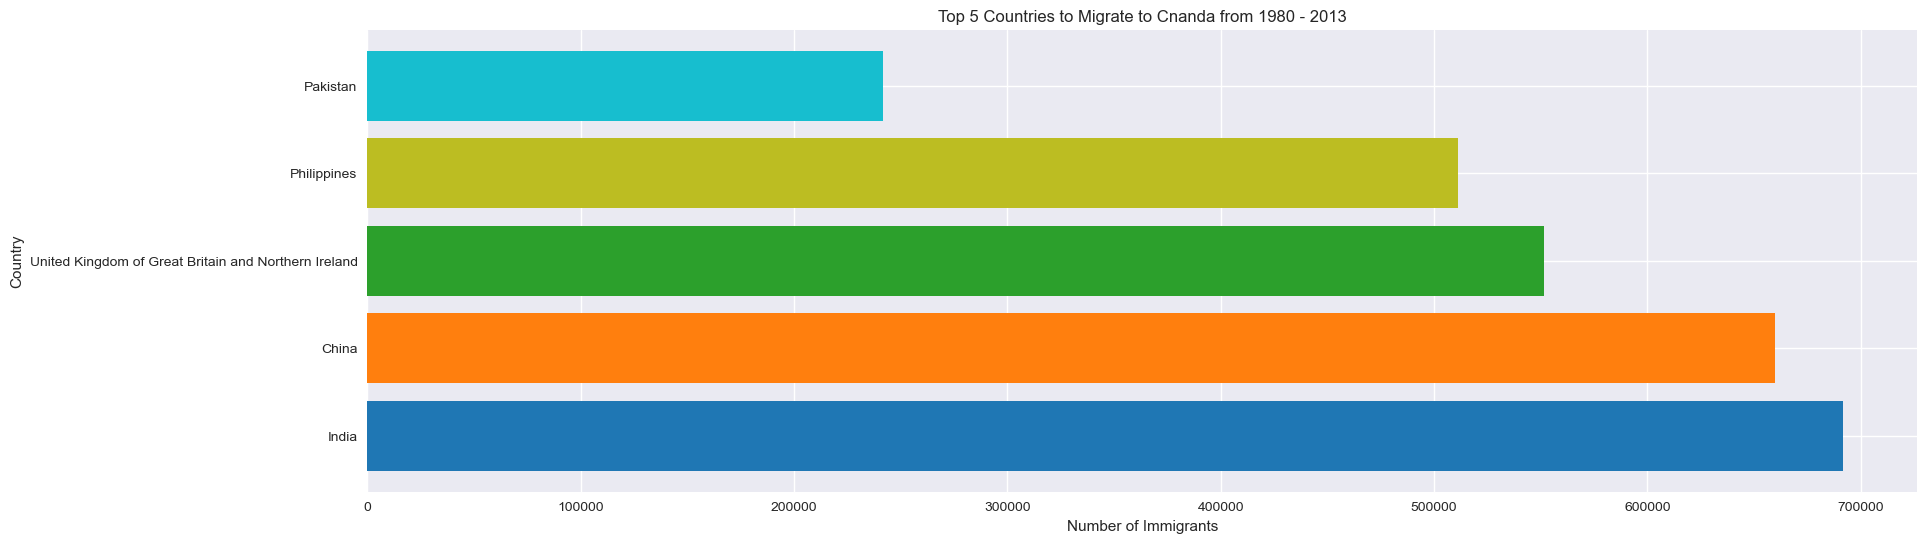

In [38]:
plt.figure(figsize=(20, 6))

plt.barh("Country", "Total", data=df_top5, color=("tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:cyan"))
plt.title("Top 5 Countries to Migrate to Cnanda from 1980 - 2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Country")

plt.show()

### Least 5 five countries with the lowest immkigrants

In [40]:
df_bottom5 = df[["Country", "Total"]].sort_values("Total", ascending=True).head()
df_bottom5

,Country,Total
131,Palau,1
109,Marshall Islands,2
191,Western Sahara,2
149,San Marino,5
123,New Caledonia,5


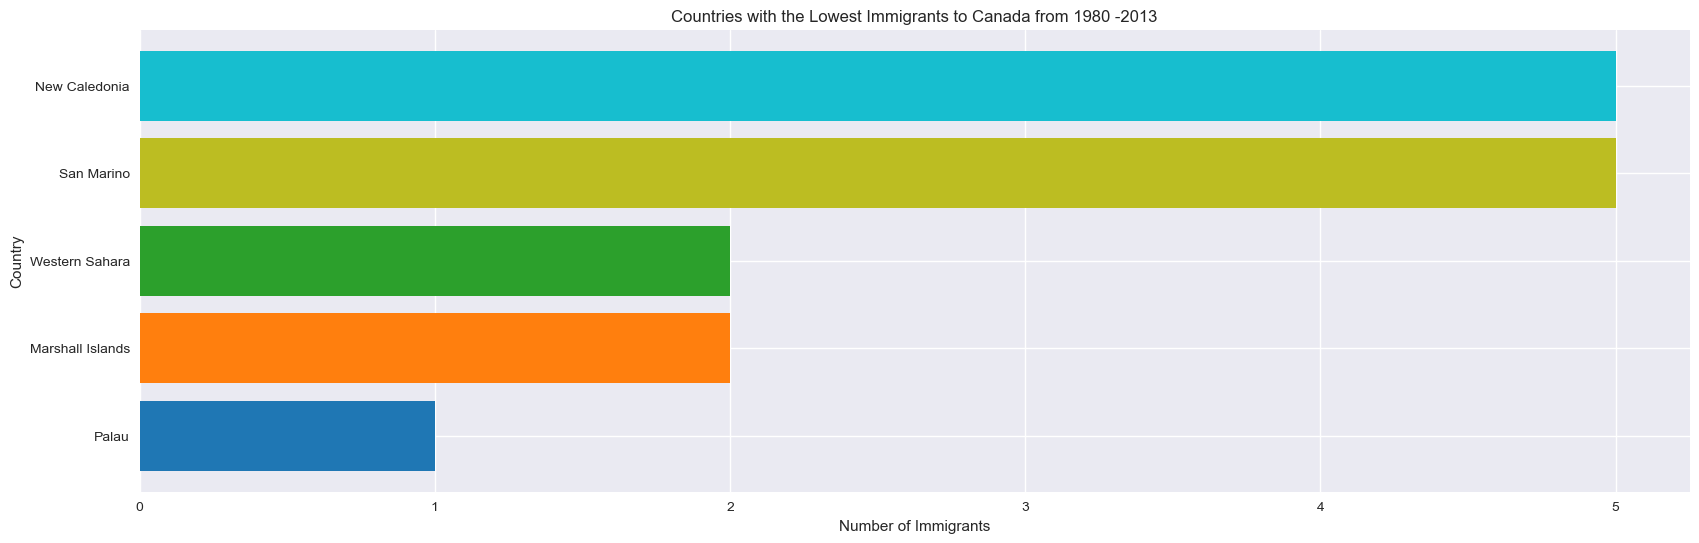

In [41]:
plt.figure(figsize=(20, 6))
plt.barh("Country", "Total", data=df_bottom5, color=("tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:cyan"))
plt.title("Countries with the Lowest Immigrants to Canada from 1980 -2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Country")

plt.show()